---
# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset : credit-card-information

## Objective : 

Mengevaluasi konsep Clustering sebagai berikut:

-   Mampu memperoleh data menggunakan BigQuery
-   Mampu mempersiapkan data untuk digunakan dalam Clustering
-   Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
-   Mampu mengimplementasikan Clustering pada data yang diberikan

### 1a. SQL Querry

select *
from `ftds-hacktiv8-project.phase1_ftds_014.credit-card-information`
where mod (CUST_ID,2)=0;

---
# 2. Import Libraries
> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [3]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
import matplotlib as mpl
from matplotlib.ticker import FixedLocator, FixedFormatter
from feature_engine.outliers import Winsorizer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

---
# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, 

In [4]:
#Data Loading from credit-card-information
df = pd.read_csv('h8dsft_P1G4_adnan_rio.csv')
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [5]:
#show tail data
df.tail(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [6]:
# copy df untuk menjaga data asli
df_copy = df.copy()

In [7]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


In [8]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

Tidak ada null data. Lanjutkan ke EDA untuk melihat isi data.

---
# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

In [9]:
df_copy.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [10]:
df_EDA = df.copy()

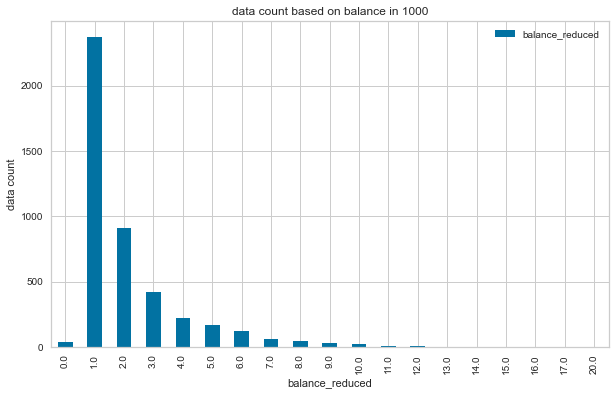

In [11]:
#tampilkan data berdasarkan balance
df_EDA['balance_reduced'] = np.ceil(df_EDA['BALANCE']/1000)
gruopeddf = df_EDA.groupby(['balance_reduced'])[['balance_reduced']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('balance_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on balance in 1000') # add title to the plot

plt.show()

Customer credit card memiliki balance tersisa sejumlah 1-1000 lebih banyak dibanding jumlah lain. Bahkan ada beberapa customer yang tidak memiliki balance sama sekali namun, jika dilihat secara detail dengan tabel dibawah diketahui bahwa banyak dari customer memang tidak menyimpan balance namun tetap melakukan pembayaran atau pembelian.

In [12]:
df_EDA[(df_EDA['BALANCE']==0)].head(4)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,balance_reduced
27,1830,0.0,0.0,66.75,0.0,66.75,0.0,0.25,0.000000,0.250000,0.0,0,3,4000.0,0.000000,NaN,0.0,12,0.0
94,6812,0.0,0.0,64.62,0.0,64.62,0.0,0.25,0.000000,0.250000,0.0,0,3,1000.0,0.000000,NaN,0.0,12,0.0
256,8898,0.0,0.0,1090.69,815.7,274.99,0.0,0.50,0.166667,0.416667,0.0,0,17,1800.0,0.000000,NaN,0.0,12,0.0
334,5254,0.0,0.0,123.10,0.0,123.10,0.0,0.75,0.000000,0.750000,0.0,0,9,4000.0,101.639354,NaN,0.0,12,0.0


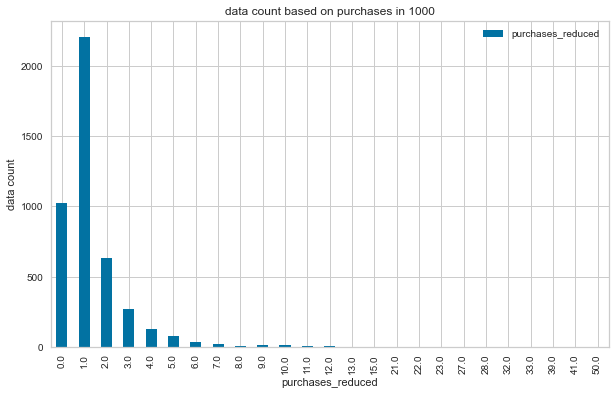

In [13]:
#tampilkan data berdasarkan purchase
df_EDA['purchases_reduced'] = np.ceil(df_EDA['PURCHASES']/1000)
gruopeddf = df_EDA.groupby(['purchases_reduced'])[['purchases_reduced']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('purchases_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on purchases in 1000') # add title to the plot

plt.show()

Mayoritas customer memakain kartu kredit untuk melakukan transaksi diantara 0 - 2000.

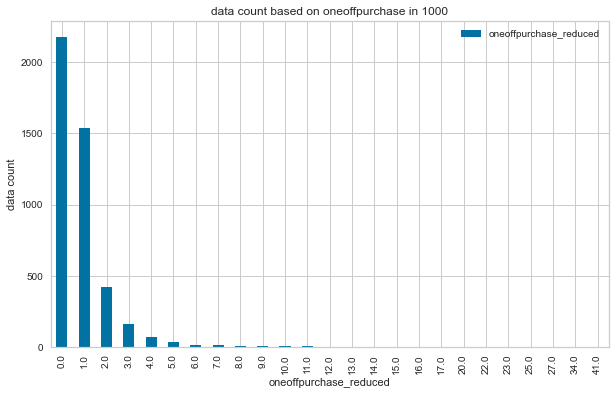

In [14]:
#tampilkan data berdasarkan one off purchase
df_EDA['oneoffpurchase_reduced'] = np.ceil(df_EDA['ONEOFF_PURCHASES']/1000)
gruopeddf = df_EDA.groupby(['oneoffpurchase_reduced'])[['oneoffpurchase_reduced']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('oneoffpurchase_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on oneoffpurchase in 1000') # add title to the plot

plt.show()

Mayoritas customer melakukan pembelian antara 0-2000 dalam satu kali transaksi.

Text(0.5, 1.0, 'data count based on installpurchase in 1000')

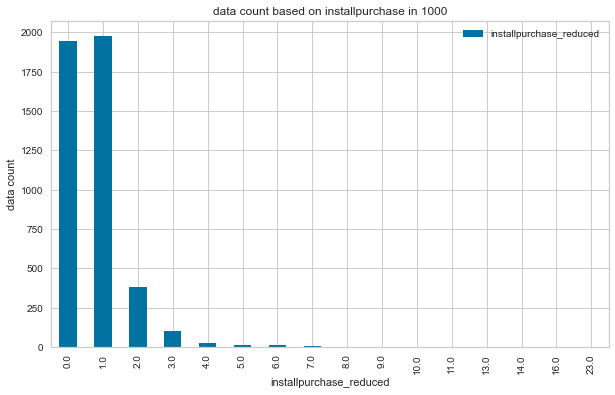

In [15]:
#tampilkan data berdasarkan installment purcaheses
df_EDA['installpurchase_reduced'] = np.ceil(df_EDA['INSTALLMENTS_PURCHASES']/1000)
gruopeddf = df_EDA.groupby(['installpurchase_reduced'])[['installpurchase_reduced']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('installpurchase_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on installpurchase in 1000') # add title to the plot

mayoritas customer melakukan installment purchasing sebesar 0 - 1000.

Text(0.5, 1.0, 'data count based on cashadvance in 1000')

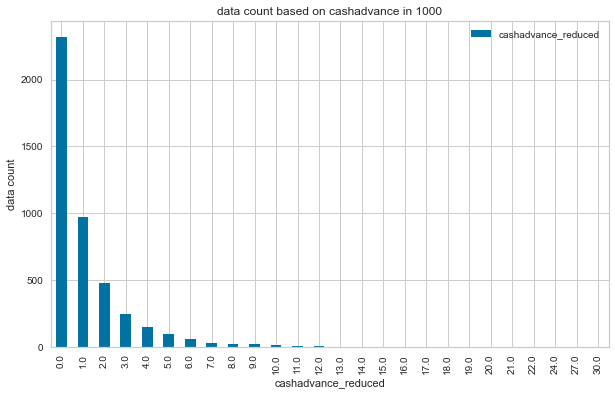

In [16]:
#tampilkan data berdasarkan cash advance
df_EDA['cashadvance_reduced'] = np.ceil(df_EDA['CASH_ADVANCE']/1000)
gruopeddf = df_EDA.groupby(['cashadvance_reduced'])[['cashadvance_reduced']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('cashadvance_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on cashadvance in 1000') # add title to the plot

Dominan customer tidak menyiapkan dana pembayaran dimuka, namun juga ada pembayaran yang menggunakan pembayaran dimuka untuk melakukan trasaksi. Sepertinya pembayaran dimuka ini terjadi karena adanya promo atau ketentuan pembelian barang yang mengharuskan adanya pembayaran dimuka.

Text(0.5, 1.0, 'data count based on cashadvancetrx in 10')

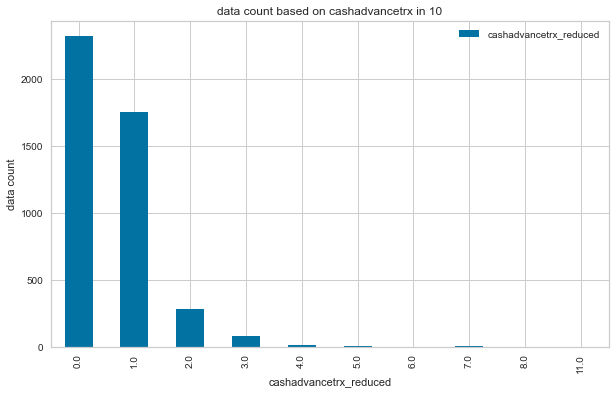

In [17]:
#tampilkan data berdasarkan balance
df_EDA['cashadvancetrx_reduced'] = np.ceil(df_EDA['CASH_ADVANCE_TRX']/10)
gruopeddf = df_EDA.groupby(['cashadvancetrx_reduced'])[['cashadvancetrx_reduced']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('cashadvancetrx_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on cashadvancetrx in 10') # add title to the plot

Karena lebih banyak customer yang tidak menyiapkan dana pembayaran dimuka, maka transaksi yang menggunakan dana ini juga tidak akan jauh berbeda dengan mayoritas customer yang tidak menggunakan opsi dana dimuka ini untuk melakukan transaksi.

Text(0.5, 1.0, 'data count based on purchasestrx in 10')

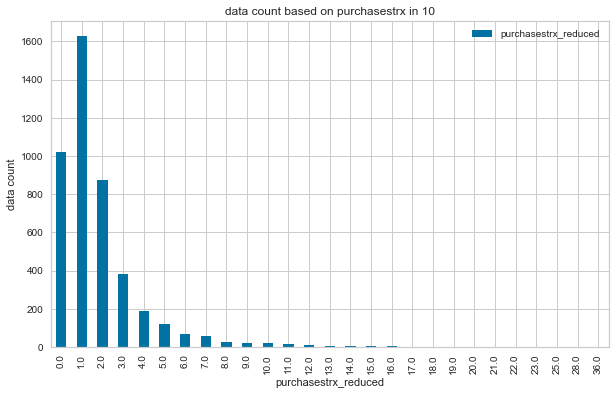

In [18]:
#tampilkan data berdasarkan balance
df_EDA['purchasestrx_reduced'] = np.ceil(df_EDA['PURCHASES_TRX']/10)
gruopeddf = df_EDA.groupby(['purchasestrx_reduced'])[['purchasestrx_reduced']].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('purchasestrx_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on purchasestrx in 10') # add title to the plot

penggunaan kartu kredit masih sedikit, dengan  banyaknya transaksi yang menggunakan kart kredit mayoritas berada pada rentang 0-10 kali.

Text(0.5, 1.0, 'data count based on payment in 1000')

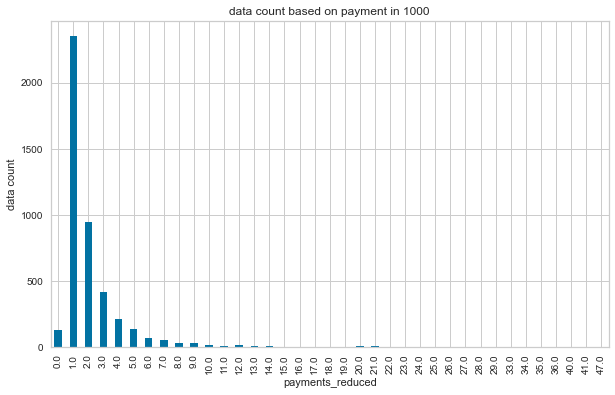

In [19]:
#tampilkan data berdasarkan balance
df_EDA['payments_reduced'] = np.ceil(df_EDA['PAYMENTS']/1000)
gruopeddf = df_EDA.groupby(['payments_reduced'])['payments_reduced'].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('payments_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on payment in 1000') # add title to the plot

Ada sebagian kecil customer yang belum pernah menggunakan kartu kredit untuk melakukan transaksi. Rentang besaran pembayaran paling banyak berada pada 0-2000 dollar.

Text(0.5, 1.0, 'data count based on minpayment in 1000')

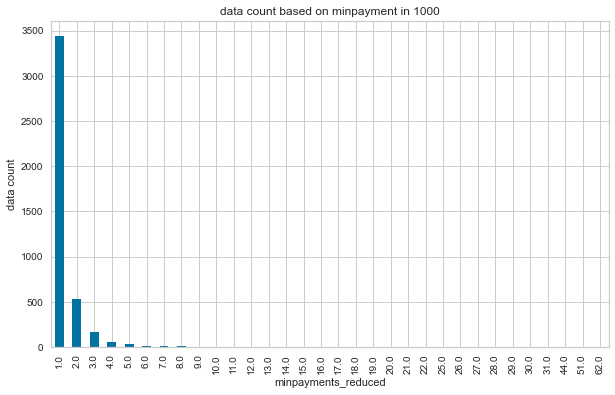

In [20]:
#tampilkan data berdasarkan balance
df_EDA['minpayments_reduced'] = np.ceil(df_EDA['MINIMUM_PAYMENTS']/1000)
gruopeddf = df_EDA.groupby(['minpayments_reduced'])['minpayments_reduced'].count()
gruopeddf.plot(kind='bar', figsize=(10, 6))

plt.xlabel('minpayments_reduced') # add to x-label to the plot
plt.ylabel('data count') # add y-label to the plot
plt.title( 'data count based on minpayment in 1000') # add title to the plot

Besaran pembayaran minimum oleh user dominan berada pada rentang 1000-2000 dolar.

---
# 5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [21]:
#Get data inference sebanyak 30 row sample dan lock randomize.
df_inf = df_copy.sample(30, random_state = 15)
df_inf.shape

(30, 18)

In [22]:
# Hapus data yang dipakai oleh data inference dari df
df_trts = df_copy.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test, telah berkurang 20 row dari 299:
df_trts.shape

(4445, 18)

In [23]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

In [24]:
df_trts

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
3,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
4,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,2500.0,343.102984,712.986387,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4441,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4442,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4443,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [25]:
# Hapus data yang dipakai oleh data inference dari df
X_train = df_trts.copy()
# Cek ukuran dataset untuk train dan test, telah berkurang 30 row dari 4475:
X_train.shape

(4445, 18)

## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

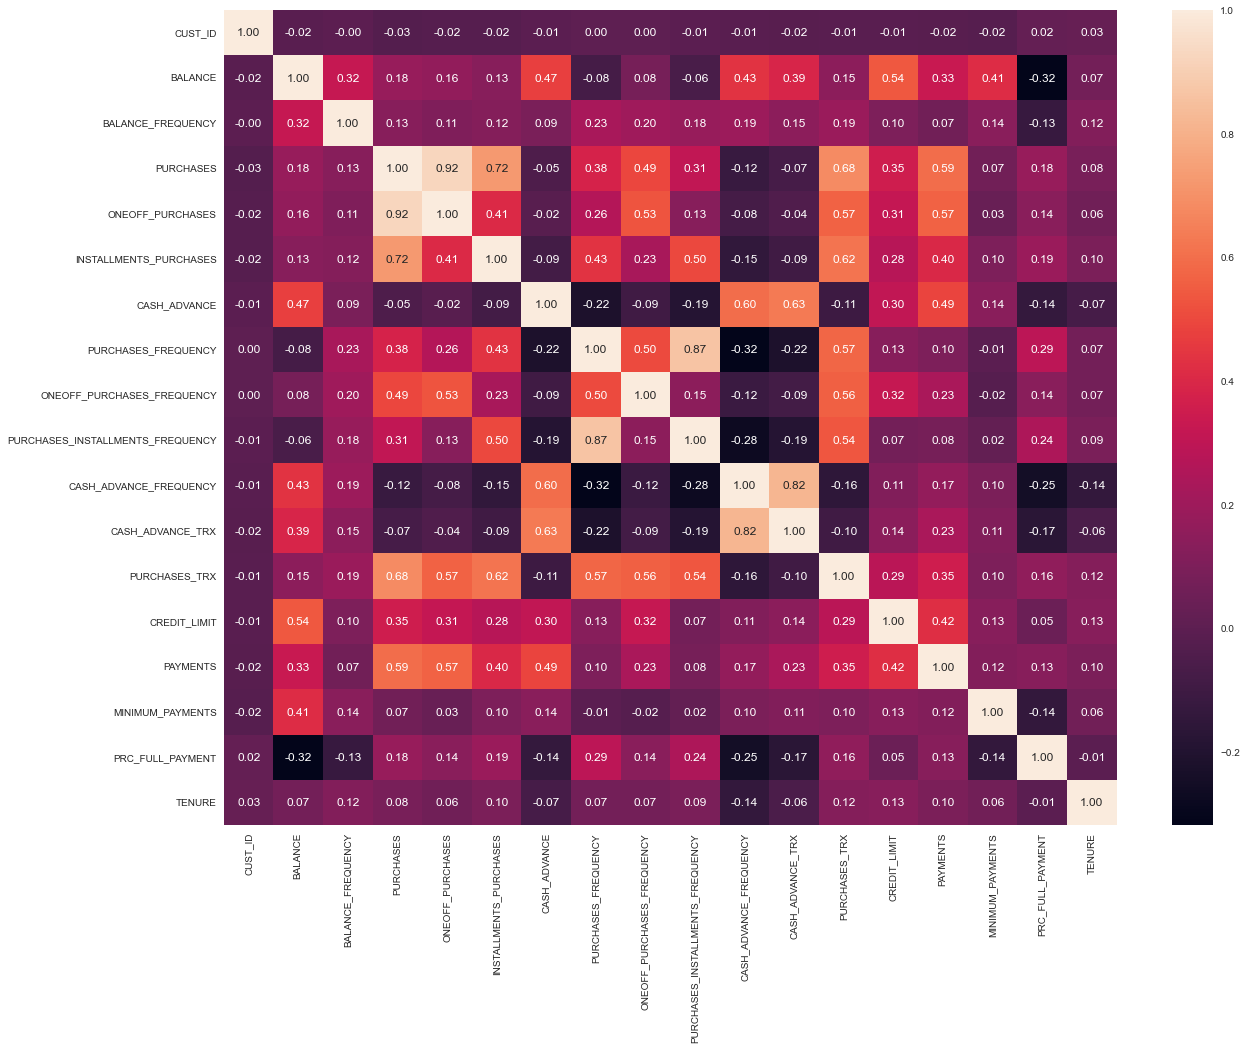

In [26]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(X_train.corr(), annot=True, fmt='.2f')
plt.show()

dari heatmap dapat diketahui bahwa feature memiliki korelasi satu dengan lainnya. Lanjut dengan memilih kolom numeric k dikarenakan PCA hanya mengolah fitur-fitur numeric. Semua kolom numerik akan dipilih, dikarenakan tidak adanya target.

In [27]:
#Display X_train to see the features
X_train.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
3,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8
4,4266,2237.238086,1.000,120.0,120.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,2500.0,343.102984,712.986387,0.0,8


In [28]:
#Memilih feature numerical dan categorical
num_col =['BALANCE', 'PURCHASES','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS','MINIMUM_PAYMENTS']
cat_col = ['CUST_ID','BALANCE_FREQUENCY','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT', 'TENURE']

In [29]:
# Split data set sesuai dengan categorical dan numerical
X_num = X_train[num_col]
X_cat = X_train[cat_col]

In [30]:
#show Xtrain num
X_num.head(5)

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS
0,16.581535,200.0,0.0,200.0,0.0,0,2,0.000000,NaN
1,943.584041,103.0,103.0,0.0,0.0,0,1,215.325023,410.484825
2,461.455720,585.0,585.0,0.0,0.0,0,1,258.032630,151.696433
3,1053.594730,1450.0,1450.0,0.0,0.0,0,1,397.090516,227.143184
4,2237.238086,120.0,120.0,0.0,0.0,0,1,343.102984,712.986387


## Missing value handling

In [31]:
# Looking missing value in X_train
X_num.isnull().sum()

BALANCE                     0
PURCHASES                   0
ONEOFF_PURCHASES            0
INSTALLMENTS_PURCHASES      0
CASH_ADVANCE                0
CASH_ADVANCE_TRX            0
PURCHASES_TRX               0
PAYMENTS                    0
MINIMUM_PAYMENTS          156
dtype: int64

Terdapat missing value, perlu adanya missing value handling dengan memasukkan median dari X (bukan data inference), lakukan juga pada data inference

In [32]:
#copy for missing value handling
X_num_mv = X_num.copy()

In [33]:
#menghitung median
a = X_num_mv[(np.isnan(X_num_mv['MINIMUM_PAYMENTS'])==False)]
med = np.median(a.MINIMUM_PAYMENTS)
med

312.167299

In [34]:
#mengganti NAN dengan median data X
X_num_mv['MINIMUM_PAYMENTS'] = X_num_mv['MINIMUM_PAYMENTS'].fillna(med)


In [35]:
# Looking missing value in X_train and test
print('train missing value: ', X_num_mv.isnull().sum())

train missing value:  BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
dtype: int64


semua missing value telah di handling, tidak ada lagi missing value

## Outliers handling

Plot setiap data numerik untuk melihat adanya outliers serta melihat distribusinya.

In [36]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print(variable)
    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

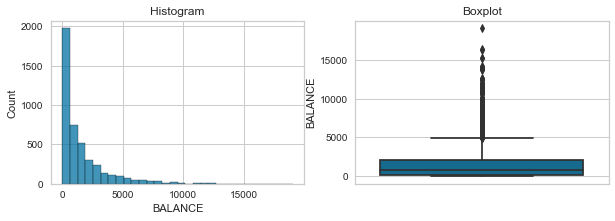

BALANCE
skewness: 2.450353087328699
the distribution is skewed


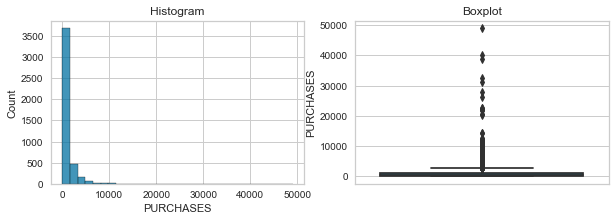

PURCHASES
skewness: 8.970322931285319
the distribution is skewed


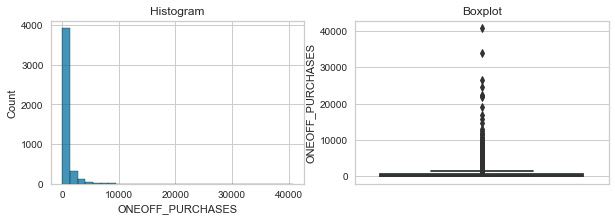

ONEOFF_PURCHASES
skewness: 10.120816221823588
the distribution is skewed


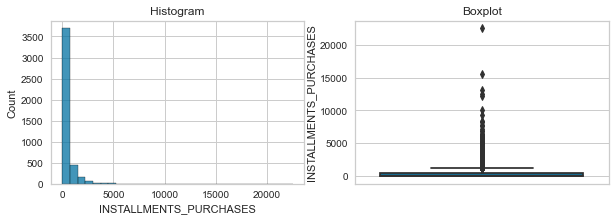

INSTALLMENTS_PURCHASES
skewness: 8.115272597700525
the distribution is skewed


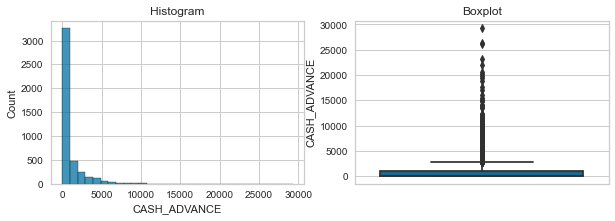

CASH_ADVANCE
skewness: 4.729049535750901
the distribution is skewed


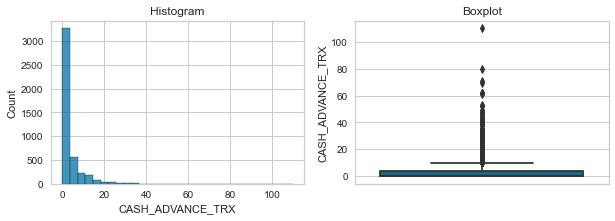

CASH_ADVANCE_TRX
skewness: 4.746943920615816
the distribution is skewed


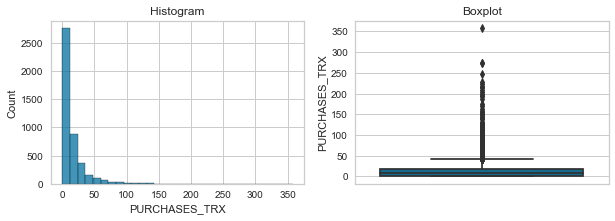

PURCHASES_TRX
skewness: 4.480668502278106
the distribution is skewed


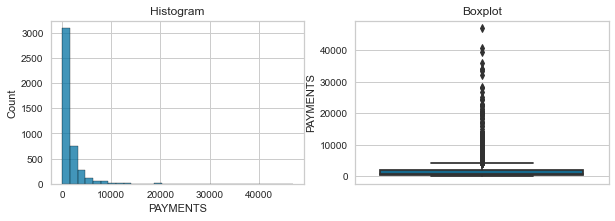

PAYMENTS
skewness: 6.027557896456223
the distribution is skewed


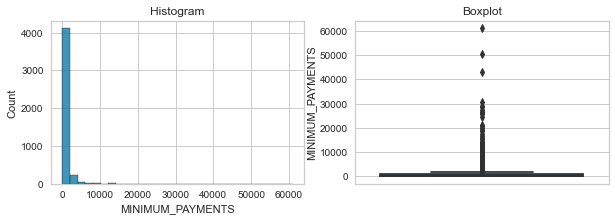

MINIMUM_PAYMENTS
skewness: 12.626448774155943
the distribution is skewed


In [37]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
for i in X_num_mv.columns:
    hist_boxplot(X_num_mv, i)

Semua feature pada kolom num skew, maka scaling akan dilakukan dengan menggunakan minmax scaler. Outlier juga akan di handle dengan menggunakan winsorizer.

In [38]:
# Membuat fungsi tukey untuk menghitung upper limit dan lower limit bagi ketiga feature
def skewed_limit(df, variable):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_limit = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_limit = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_limit, lower_limit

In [39]:
# Mencari UL dan LL bagi semua feature numerik
BALANCE_UL,BALANCE_LL = skewed_limit(X_num_mv,'BALANCE')
PURCHASES_UL,PURCHASES_LL = skewed_limit(X_num_mv,'PURCHASES')
ONEOFF_PURCHASES_UL,ONEOFF_PURCHASES_LL = skewed_limit(X_num_mv,'ONEOFF_PURCHASES')
INSTALLMENTS_PURCHASES_UL,INSTALLMENTS_PURCHASES_LL = skewed_limit(X_num_mv,'INSTALLMENTS_PURCHASES')

CASH_ADVANCE_UL,CASH_ADVANCE_LL = skewed_limit(X_num_mv,'CASH_ADVANCE')
CASH_ADVANCE_TRX_UL,CASH_ADVANCE_TRX_LL = skewed_limit(X_num_mv,'CASH_ADVANCE_TRX')
PURCHASES_TRX_UL,PURCHASES_TRX_LL = skewed_limit(X_num_mv,'PURCHASES_TRX')

PAYMENTS_UL,PAYMENTS_LL = skewed_limit(X_num_mv,'PAYMENTS')
MINIMUM_PAYMENTS_UL,MINIMUM_PAYMENTS_LL = skewed_limit(X_num_mv,'MINIMUM_PAYMENTS')


print('BALANCE LL and UL = ', BALANCE_UL,' and ', BALANCE_LL)
print('PURCHASES LL and UL = ', PURCHASES_UL ,' and ', PURCHASES_LL)
print('ONEOFF_PURCHASES LL and UL = ', ONEOFF_PURCHASES_UL,' and ', ONEOFF_PURCHASES_LL)
print('INSTALLMENTS_PURCHASES LL and UL = ', INSTALLMENTS_PURCHASES_UL,' and ', INSTALLMENTS_PURCHASES_LL)
print('CASH_ADVANCE LL and UL = ', CASH_ADVANCE_UL,' and ', CASH_ADVANCE_LL)
print('CASH_ADVANCE_TRX LL and UL = ', CASH_ADVANCE_TRX_UL,' and ', CASH_ADVANCE_TRX_LL)
print('PURCHASES_TRX LL and UL = ', PURCHASES_TRX_UL,' and ', PURCHASES_TRX_LL)
print('PAYMENTS LL and UL = ', PAYMENTS_UL,' and ', PAYMENTS_LL)
print('MINIMUM_PAYMENTS LL and UL = ', MINIMUM_PAYMENTS_UL,' and ', MINIMUM_PAYMENTS_LL)

BALANCE LL and UL =  4973.4858315  and  -2770.6063805
PURCHASES LL and UL =  2736.495  and  -1581.2249999999997
ONEOFF_PURCHASES LL and UL =  1451.1000000000001  and  -870.6600000000001
INSTALLMENTS_PURCHASES LL and UL =  1200.0  and  -720.0
CASH_ADVANCE LL and UL =  2752.9459850000003  and  -1651.767591
CASH_ADVANCE_TRX LL and UL =  10.0  and  -6.0
PURCHASES_TRX LL and UL =  41.0  and  -23.0
PAYMENTS LL and UL =  4155.885448  and  -1867.293992
MINIMUM_PAYMENTS LL and UL =  1728.7625580000001  and  -763.5867460000002


In [40]:
# Fungsi untuk memfilter outlier (mencari outlier)
def find_outliers(df,variable,upper,lower):
  return df[
            (df[variable] > upper) |
            (df[variable] < lower)
            ]

In [41]:
#mencari outliers distance, menyimpannya ke dalam variable agar indexnya dapat digunakan untuk drop index pada category dan y(target)
print('BALANCE :',(find_outliers(X_num_mv,'MINIMUM_PAYMENTS',MINIMUM_PAYMENTS_UL,MINIMUM_PAYMENTS_LL)).shape[0])
print('PURCHASES :',(find_outliers(X_num_mv,'PURCHASES',PURCHASES_UL,PURCHASES_LL)).shape[0])
print('ONEOFF_PURCHASES :',(find_outliers(X_num_mv,'ONEOFF_PURCHASES',ONEOFF_PURCHASES_UL,ONEOFF_PURCHASES_LL)).shape[0])
print('INSTALLMENTS_PURCHASES :',(find_outliers(X_num_mv,'INSTALLMENTS_PURCHASES',INSTALLMENTS_PURCHASES_UL,INSTALLMENTS_PURCHASES_LL)).shape[0])
print('CASH_ADVANCE :',(find_outliers(X_num_mv,'CASH_ADVANCE',CASH_ADVANCE_UL,CASH_ADVANCE_LL)).shape[0])
print('CASH_ADVANCE_TRX :',(find_outliers(X_num_mv,'CASH_ADVANCE_TRX',CASH_ADVANCE_TRX_UL,CASH_ADVANCE_TRX_LL)).shape[0])
print('PURCHASES_TRX :',(find_outliers(X_num_mv,'PURCHASES_TRX',PURCHASES_TRX_UL,PURCHASES_TRX_LL)).shape[0])
print('PAYMENTS :',(find_outliers(X_num_mv,'PAYMENTS',PAYMENTS_UL,PAYMENTS_LL)).shape[0])
print('MINIMUM_PAYMENTS :',(find_outliers(X_num_mv,'MINIMUM_PAYMENTS', MINIMUM_PAYMENTS_UL,MINIMUM_PAYMENTS_LL)).shape[0])


BALANCE : 425
PURCHASES : 383
ONEOFF_PURCHASES : 485
INSTALLMENTS_PURCHASES : 412
CASH_ADVANCE : 512
CASH_ADVANCE_TRX : 400
PURCHASES_TRX : 364
PAYMENTS : 394
MINIMUM_PAYMENTS : 425


In [42]:
X_num_mv.shape

(4445, 9)

dikarenakan kebanyakan outlier mencapai 10% dari keseluruhan data maka, data harus di handle dengan capping karena jika di trimming data akan berkurang banyak dan mengakibatkan kehilangan data yang penting.

In [43]:
# membuat windsorizer
windsoriser = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='right', #right tails 
                          fold=1.5,
                          variables=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'PAYMENTS','MINIMUM_PAYMENTS'])

windsoriser.fit(X_num_mv)

X_num_wo = windsoriser.transform(X_num_mv)

Outlier capping telah berhasil di handle

## Feature Scaling

Selanjutnya lakukan scaling dengan menggunakan minmaxscaller dikarenakan seluruh data memiliki distribusi skew.

In [44]:
#Feature scaling dengan menggunakan minmax scaler
scaler = MinMaxScaler()
scaler.fit(X_num_wo)

X_num_sc = scaler.transform(X_num_wo) #scaling train
X_num_sc

array([[0.00333399, 0.07308619, 0.        , ..., 0.04878049, 0.        ,
        0.1805548 ],
       [0.18972288, 0.03763939, 0.07098064, ..., 0.02439024, 0.05181207,
        0.23742766],
       [0.09278316, 0.21377711, 0.40314244, ..., 0.02439024, 0.06208848,
        0.08772865],
       ...,
       [0.68090892, 0.20499946, 0.29441114, ..., 0.48780488, 0.2500069 ,
        0.51252373],
       [0.9732702 , 0.58320223, 1.        , ..., 0.6097561 , 0.21796675,
        1.        ],
       [0.39750934, 0.37713937, 0.15636414, ..., 0.41463415, 0.73544495,
        0.52678701]])

## Dimension Reduction

Lakukan dimension reduction untuk meringankan process clustering serta meningkatkan ketepatan hasil clustering.

In [45]:
# Create DataFrame of `X_train_final`

X_num_fin = pd.DataFrame(X_num_sc, columns=num_col)
X_num_fin

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS
0,0.003334,0.073086,0.000000,0.166667,0.000000,0.0,0.048780,0.000000,0.180555
1,0.189723,0.037639,0.070981,0.000000,0.000000,0.0,0.024390,0.051812,0.237428
2,0.092783,0.213777,0.403142,0.000000,0.000000,0.0,0.024390,0.062088,0.087729
3,0.211842,0.529875,0.999242,0.000000,0.000000,0.0,0.024390,0.095549,0.131372
4,0.449833,0.043852,0.082696,0.000000,0.000000,0.0,0.024390,0.082558,0.412413
...,...,...,...,...,...,...,...,...,...
4440,0.216952,0.000000,0.000000,0.000000,0.457536,0.9,0.000000,0.331971,0.156952
4441,0.162780,0.000000,0.000000,0.000000,1.000000,0.7,0.000000,1.000000,0.139761
4442,0.680909,0.204999,0.294411,0.111467,0.729456,0.9,0.487805,0.250007,0.512524
4443,0.973270,0.583202,1.000000,0.000000,1.000000,1.0,0.609756,0.217967,1.000000


### VIF

Lakukan VIF untuk melihat banyaknya dimensi yang di rekomendasikan.

In [46]:
vif_data = pd.DataFrame()
vif_data["features"] = X_num_fin.columns

#calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_num_fin.values, i)
                        for i in range(len(X_num_fin.columns))]
vif_data.sort_values(by='VIF',ascending=False)

,features,VIF
1,PURCHASES,24.982145
2,ONEOFF_PURCHASES,11.719144
3,INSTALLMENTS_PURCHASES,8.805308
0,BALANCE,7.084539
8,MINIMUM_PAYMENTS,6.435782
6,PURCHASES_TRX,5.957032
4,CASH_ADVANCE,4.852178
5,CASH_ADVANCE_TRX,4.075855
7,PAYMENTS,3.693903


Jumlah dimensi yang direkomendasikan ditunjukkan dari banyaknya kolom dengan nilai VIF diatas 5 yang dimana adalah 6 dimensi

### EVR

In [47]:
pca = PCA()
pca.fit(X_num_fin)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

6

In [48]:
print(cumsum)

[0.38072923 0.7041545  0.79794533 0.88348448 0.93459575 0.95887514
 0.98074688 0.99548717 1.        ]


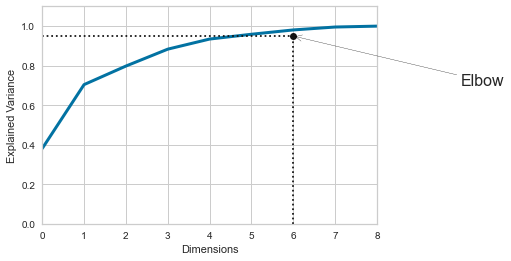

In [49]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 8, 0, 1.1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(6, 0.95), xytext=(10, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

Hasil EVR menunjukkan bahwa dengan menggunakan 6 dimensi telah mencakup 95% dari data. Maka 6 dimensi diambil sebagai jumlah dimensi PCA.

### PCA

In [50]:
pca = PCA(n_components=6)
pca.fit(X_num_fin)
X_reduced = pca.transform(X_num_fin)

PCA telah dilakukan

### Defining n cluster

In [51]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=26).fit(X_reduced)
                for k in range(1, 9)]

Elbow Method


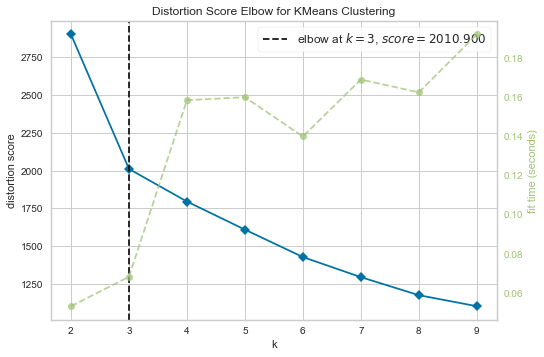

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [52]:
print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=9)
Elbow_M.fit(X_reduced)
Elbow_M.show()

In [53]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_reduced)
                for k in range(1, 7)]

silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

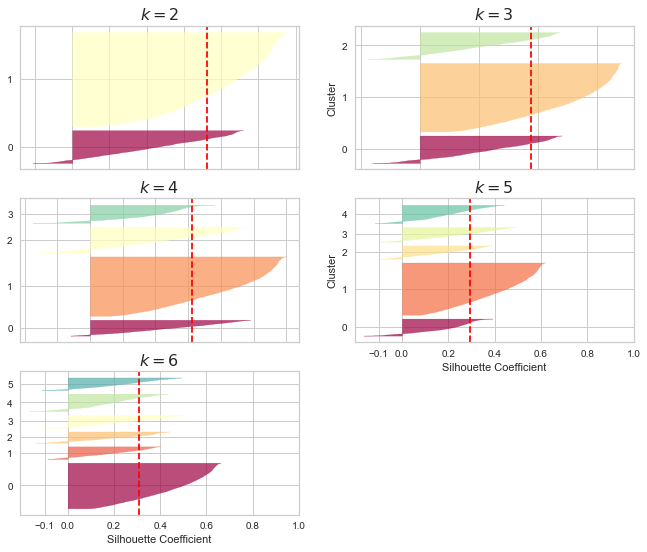

In [54]:
plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5, 6):
    plt.subplot(3, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X_reduced, y_pred)

    padding = len(X_reduced) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)


Melihat dari hasil ELbow dan silhouette, jumlah clsuter yang direkomendasikan adalah 3. Dilihat dari semua pisau (grafik) melewati garis merah dan bentuk masing-masing pisau tidak terlalu kontras.

---
# 6. Model definition

Notes :
Algorithm which will be used are KMeans,Spectral,Agglomerative.

Dengan metrics yang akan dipakai untuk mengevaluasi adalah pca 2d, 3d dan sihouette score

---
# 7. Model Training

Semua model menggunakan hasil elbow dan silhouette visualization, maka n_clusters = 3 bagi semua model

## KMeans

In [55]:
#fit K Means
kmeans = KMeans(n_clusters=3, random_state=15)
kmeans.fit(X_reduced)

KMeans(n_clusters=3, random_state=15)

## Agglomerative

In [56]:
#fit agglo
agglo = AgglomerativeClustering(n_clusters=3)
agglo.fit(X_reduced)

AgglomerativeClustering(n_clusters=3)

### Spectral

In [57]:
#fit spectral
spectral = SpectralClustering(n_clusters=3, random_state=15)
spectral.fit(X_reduced)

SpectralClustering(n_clusters=3, random_state=15)

---
# 8. Model Evaluation

### Input clustering results

In [58]:
Cluster = X_train.copy()
Cluster['cluster_kmeans'] = kmeans.labels_

In [59]:
Cluster['cluster_agglo'] = agglo.labels_

In [60]:
Cluster['cluster_spectral'] = spectral.labels_

In [61]:
Cluster

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_kmeans,cluster_agglo,cluster_spectral
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,...,0,2,1200.0,0.000000,NaN,0.000000,8,0,2,0
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,1000.0,215.325023,410.484825,0.000000,8,0,2,0
2,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,1000.0,258.032630,151.696433,0.000000,8,0,2,0
3,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,1500.0,397.090516,227.143184,0.000000,8,0,1,0
4,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,2500.0,343.102984,712.986387,0.000000,8,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,...,9,0,1200.0,1379.635287,271.364415,0.090909,11,1,2,0
4441,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,...,7,0,4150.0,4372.148648,241.645387,0.090909,11,1,2,2
4442,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,...,9,20,10100.0,1039.000037,886.050237,0.000000,11,1,0,2
4443,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,...,17,25,6000.0,905.844846,2376.919568,0.090909,11,1,0,2


### 2D mapping

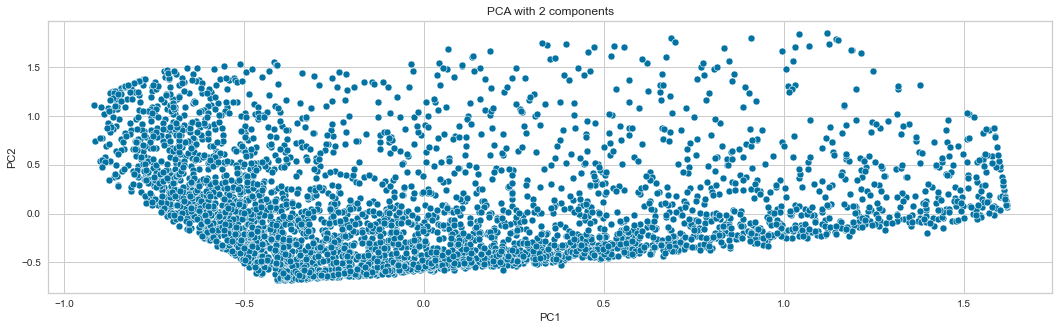

In [62]:
pca_2d = PCA(n_components=2, random_state=26)
X_2d  = pca_2d.fit_transform(X_reduced)

plt.figure(figsize=(18, 5))
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA with 2 components')
plt.show()

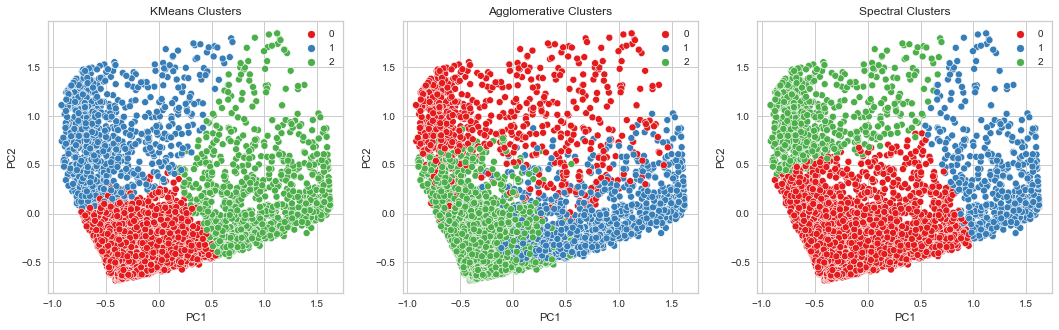

In [63]:
plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=kmeans.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('KMeans Clusters')

plt.subplot(1,3,2)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=agglo.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clusters')

plt.subplot(1,3,3)
sns.scatterplot(x=X_2d[:, 0], y=X_2d[:, 1], hue=spectral.labels_, palette='Set1')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Spectral Clusters')
plt.show()

dilihat dari 2D mapping, K means dan spectral menunjukkan hasil clustering dengan garis yang lebih tegas (sedikit terdapat data yang menumpuk ke cluster lainnya). Lanjutkan ke mapping 3D

### 3D mapping

In [64]:
pca_3d = PCA(n_components=3, random_state=26)
X_3d  = pca_3d.fit_transform(X_reduced)

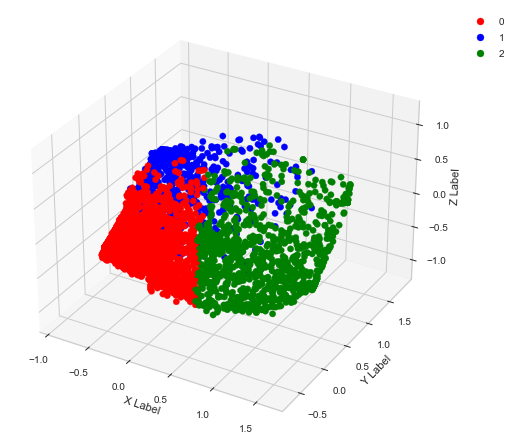

In [65]:
# generate data
x = X_3d[:,0]
y = X_3d[:,1]
z = X_3d[:,2]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
colors =["red","blue","green"]
cmap = ListedColormap(colors=colors)


# plot
sc = ax.scatter(x, y, z, s=40, c=kmeans.labels_, cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

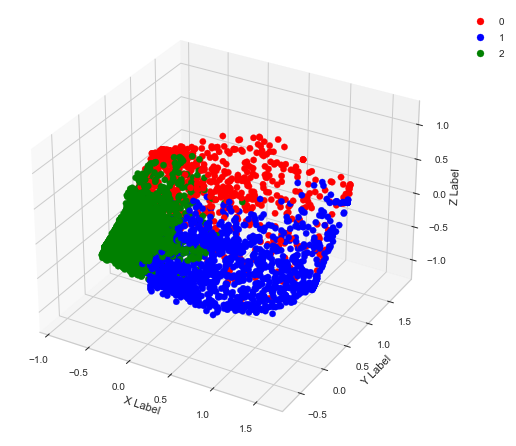

In [66]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(x, y, z, s=40, c=agglo.labels_, cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

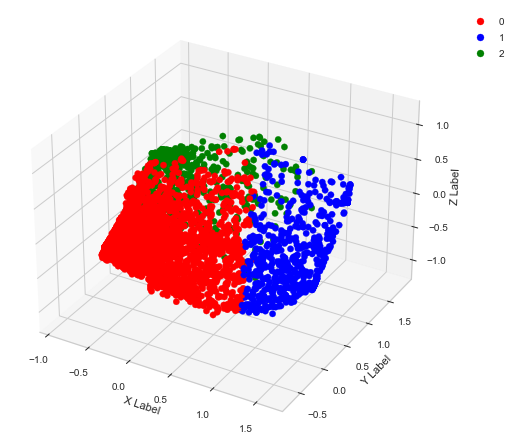

In [67]:
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(x, y, z, s=40, c=spectral.labels_, cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

Dari hasil mapping 3D juga didapatkan bahwa clustering dengan K means dan spectral menghasilkan pembagian cluster yang minim data yang saling tumpang tindih seperti yang terlihat pada agglomerative clustering. Lanjutkan ke sihouette score.

### Silhouette Score

In [68]:
print("silhouette score KMeans : ",silhouette_score(X_reduced,kmeans.labels_))
print("silhouette score Agglomerative : ",silhouette_score(X_reduced,agglo.labels_))
print("silhouette score Spectral : ",silhouette_score(X_reduced,spectral.labels_))

silhouette score KMeans :  0.37474138831499676
silhouette score Agglomerative :  0.30419893684185906
silhouette score Spectral :  0.37018800952963316


Seperti hasil analisis pada 2D dan 3D, hasil silhouette score juga menunjukkan bahwa K means dan spectral menunjukkan performa yang bagus. Semakin mendekati 1 maka clustering semakin baik tidak adanya data yang mengalami kesalahan berada pada cluster yang salah.

# EDA after clustering

Setelah clustering dilakukan, maka EDA perlu di lakukan sekali lagi untuk melihat dan menganalisa hasil clustering.

In [69]:
Cluster

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster_kmeans,cluster_agglo,cluster_spectral
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,...,0,2,1200.0,0.000000,NaN,0.000000,8,0,2,0
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,1000.0,215.325023,410.484825,0.000000,8,0,2,0
2,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,1000.0,258.032630,151.696433,0.000000,8,0,2,0
3,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,1500.0,397.090516,227.143184,0.000000,8,0,1,0
4,4266,2237.238086,1.000000,120.00,120.00,0.00,0.000000,0.125000,0.125000,0.000000,...,0,1,2500.0,343.102984,712.986387,0.000000,8,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,...,9,0,1200.0,1379.635287,271.364415,0.090909,11,1,2,0
4441,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,...,7,0,4150.0,4372.148648,241.645387,0.090909,11,1,2,2
4442,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,...,9,20,10100.0,1039.000037,886.050237,0.000000,11,1,0,2
4443,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,...,17,25,6000.0,905.844846,2376.919568,0.090909,11,1,0,2


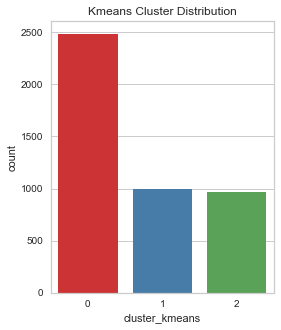

In [70]:
plt.figure(figsize=(4, 5))
sns.countplot(data=Cluster, x='cluster_kmeans', palette='Set1')
plt.title('Kmeans Cluster Distribution')
plt.show()

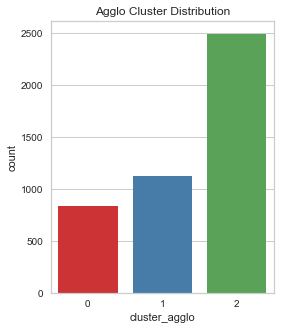

In [71]:
plt.figure(figsize=(4, 5))
sns.countplot(data=Cluster, x='cluster_agglo', palette='Set1')
plt.title('Agglo Cluster Distribution')
plt.show()

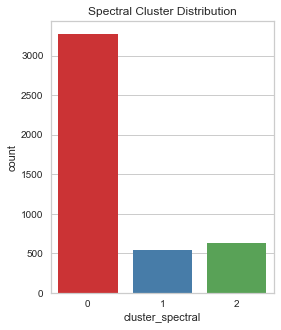

In [72]:
plt.figure(figsize=(4, 5))
sns.countplot(data=Cluster, x='cluster_spectral', palette='Set1')
plt.title('Spectral Cluster Distribution')
plt.show()

Ketiga metode menunjukkan bahwa terdapat 1 cluster yang dominan dibanding cluster lain. Cluster ini dapat dilihat lebih lanjut pada proses EDA. Proses EDA dilanjutkan pada cluster dengan model K Means diakrenakan K Means memiliki silhouette score terbaik.

### EDA KMeans result

In [73]:
#Pemisahan cluster
cluster0 = Cluster[(Cluster['cluster_kmeans'] == 0)]
cluster1 = Cluster[(Cluster['cluster_kmeans'] == 1)]
cluster2 = Cluster[(Cluster['cluster_kmeans'] == 2)]

In [74]:
#membuat data summary
summary = pd.DataFrame()
summary['cluster'] = [0,1,2]

for i in num_col:
    data = []
    data.append(cluster0[i].mean())
    data.append(cluster1[i].mean())
    data.append(cluster2[i].mean())

    summary[i] = data
    


In [75]:
summary

,cluster,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,PAYMENTS,MINIMUM_PAYMENTS
0,0,683.759794,354.297268,165.674118,189.227381,201.021438,0.962933,7.266317,708.449344,525.485932
1,1,3444.828934,329.011782,202.270433,126.808771,3447.405832,10.534743,4.815710,2775.718025,1455.670639
2,2,1921.988758,3357.593464,2070.828165,1286.864536,433.709504,1.445361,42.842268,3276.016651,1049.678929


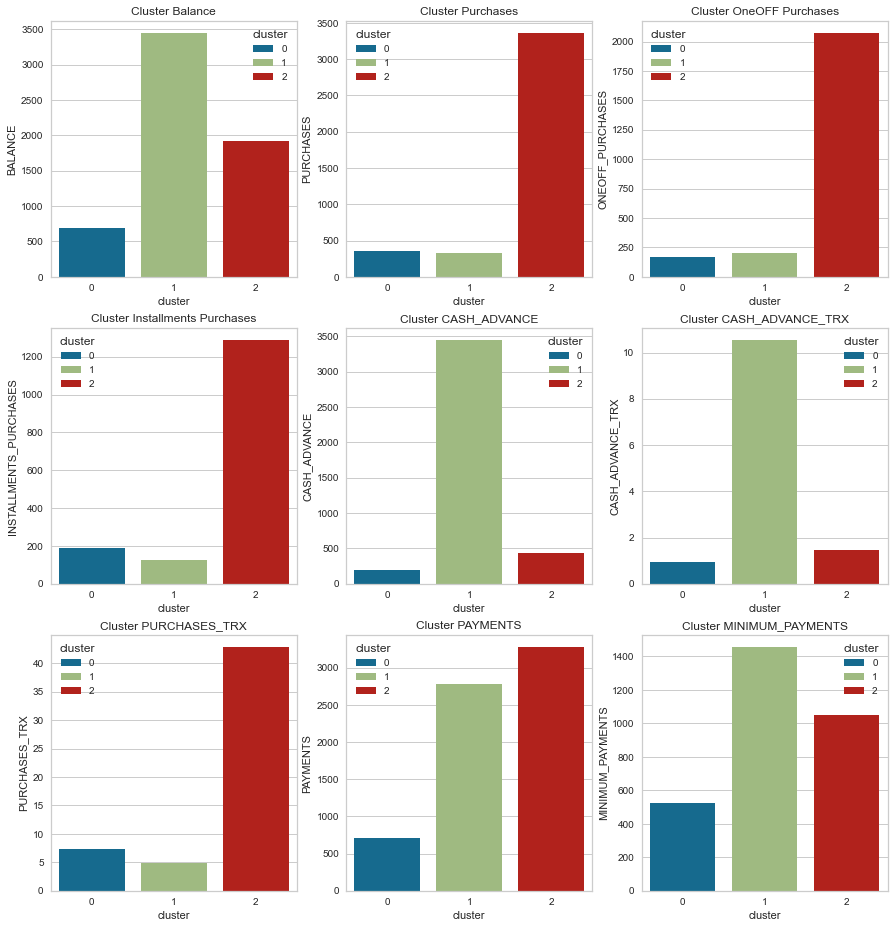

In [76]:
#lakukan plotting terhadap semua feature yang digunakan dalam clustering
plt.figure(figsize=(15, 16))

plt.subplot(3,3,1)
sns.barplot(data = summary, x='cluster', y='BALANCE', hue='cluster',dodge=False)
plt.title('Cluster Balance')

plt.subplot(3,3,2)
sns.barplot(data = summary, x='cluster', y='PURCHASES', hue='cluster',dodge=False)
plt.title('Cluster Purchases')

plt.subplot(3,3,3)
sns.barplot(data = summary, x='cluster', y='ONEOFF_PURCHASES', hue='cluster',dodge=False)
plt.title('Cluster OneOFF Purchases')

plt.subplot(3,3,4)
sns.barplot(data = summary, x='cluster', y='INSTALLMENTS_PURCHASES', hue='cluster',dodge=False)
plt.title('Cluster Installments Purchases')

plt.subplot(3,3,5)
sns.barplot(data = summary, x='cluster', y='CASH_ADVANCE', hue='cluster',dodge=False)
plt.title('Cluster CASH_ADVANCE')

plt.subplot(3,3,6)
sns.barplot(data = summary, x='cluster', y='CASH_ADVANCE_TRX', hue='cluster',dodge=False)
plt.title('Cluster CASH_ADVANCE_TRX')

plt.subplot(3,3,7)
sns.barplot(data = summary, x='cluster', y='PURCHASES_TRX', hue='cluster',dodge=False)
plt.title('Cluster PURCHASES_TRX')

plt.subplot(3,3,8)
sns.barplot(data = summary, x='cluster', y='PAYMENTS', hue='cluster',dodge=False)
plt.title('Cluster PAYMENTS')

plt.subplot(3,3,9)
sns.barplot(data = summary, x='cluster', y='MINIMUM_PAYMENTS', hue='cluster',dodge=False)
plt.title('Cluster MINIMUM_PAYMENTS')

plt.show()

Hasil pencarian data set description pada kaggle:
-BALANCE : Balance amount left in customers account to make purchases
-PURCHASES : Amount of purchases made from account
-ONEOFF_PURCHASES : Maximum purchase amount done in one-go
-INSTALLMENTS_PURCHASES : Amount of purchase done in installment
-CASH_ADVANCE : Cash in advance given by the user
-CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
-PURCHASES_TRX : Number of purchase transactions made
-PAYMENTS : Amount of Payment done by user
-MINIMUM_PAYMENTS : Minimum amount of payments made by user

Dimana dari grafik dapat dianalisa bahwa masing-masing cluster memiliki ciri khas seperti berikut:
Cluster 0 :
-Balance (Balance amount left in account)                               = Low
-Purchases (Amount of purchases made)                                   = Low
-One off purchases(Maximum purchase amount)                             = Low
-Installment Purchases (Amount of purchase in installment)              = Low
-Cash Advance (Cash in advance given by the user)                       = Low
-Cash Advance trx (Number of Transactions made with "Cash in Advanced") = Low
-Purchases trx (Number of purchase transactions made)                   = Low
-Payments (Amount of Payment done)                                      = Low
-Minimum Payments (Minimum amount of payments made)                     = Low


Cluster 1 :
-Balance (Balance amount left in account)                               = Medium
-Purchases (Amount of purchases made)                                   = High
-One off purchases(Maximum purchase amount)                             = High
-Installment Purchases (Amount of purchase in installment)              = High
-Cash Advance (Cash in advance given by the user)                       = Low
-Cash Advance trx (Number of Transactions made with "Cash in Advanced") = Low
-Purchases trx (Number of purchase transactions made)                   = High
-Payments (Amount of Payment done)                                      = High
-Minimum Payments (Minimum amount of payments made)                     = Medium

Cluster 2 :
-Balance (Balance amount left in account)                               = High
-Purchases (Amount of purchases made)                                   = Low
-One off purchases(Maximum purchase amount)                             = Low
-Installment Purchases (Amount of purchase in installment)              = Low
-Cash Advance (Cash in advance given by the user)                       = High
-Cash Advance trx (Number of Transactions made with "Cash in Advanced") = High
-Purchases trx (Number of purchase transactions made)                   = Low
-Payments (Amount of Payment done)                                      = High
-Minimum Payments (Minimum amount of payments made)                     = High

Maka dapat ditarik kesimpulan bahwa cluster 0 merupakan cluster dimana customer jarang menggunakan credit card dan memiliki balance yang rendah, cluster 1 sering menggunakan credit card dengan balance yang lumayan besar serta sering melakukan pembelian dan pembayaran namun jarang menggunakan pembayaran dimuka (Cash in Advanced), lalu cluster 2 merupakan segment customer yang sering memakai credit card namun jumlah pembelian barang rendah dengan kemampuan pembayaran creditnya tinggi dan cenderung untuk melakukan pembayaran dimuka (Cash in Advanced) dibanding menggunakan balance / purchases.

---
# 9. Model Inference

Lakukan model inference dengan data baru

In [77]:
df_inf.head(3)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,160,2948.447663,1.000000,0.0,0.0,0.0,1539.285222,0.000000,0.000000,0.0,0.333333,13,0,3000.0,207.448103,13350.556820,0.000000,12
1,7214,1075.401912,1.000000,150.0,150.0,0.0,0.000000,0.083333,0.083333,0.0,0.000000,0,1,1200.0,224.135558,443.646049,0.000000,12
2,2660,433.979083,0.545455,0.0,0.0,0.0,2779.963478,0.000000,0.000000,0.0,0.166667,4,0,1500.0,1596.987626,187.596016,0.083333,12


In [78]:
X_inf = df_inf[num_col]

In [79]:
# Looking missing value in X_train
X_inf.isnull().sum()


BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
PAYMENTS                  0
MINIMUM_PAYMENTS          2
dtype: int64

In [80]:
#imput NaN dengan median
X_inf['MINIMUM_PAYMENTS'] = X_inf['MINIMUM_PAYMENTS'].fillna(med)

C:\Users\SBD-HP\AppData\Local\Temp\ipykernel_6036\1587648844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_inf['MINIMUM_PAYMENTS'] = X_inf['MINIMUM_PAYMENTS'].fillna(med)


In [81]:
# Looking missing value in X_train
X_inf.isnull().sum()


BALANCE                   0
PURCHASES                 0
ONEOFF_PURCHASES          0
INSTALLMENTS_PURCHASES    0
CASH_ADVANCE              0
CASH_ADVANCE_TRX          0
PURCHASES_TRX             0
PAYMENTS                  0
MINIMUM_PAYMENTS          0
dtype: int64

In [82]:
#outlier handling dengan capping
X_inf_wo = windsoriser.transform(X_inf)

In [83]:
#lakukan scaling
X_inf_scaled = scaler.transform(X_inf_wo) 
X_inf_fin = pd.DataFrame( X_inf_scaled , columns=num_col)

In [84]:
#lakukan pca
X_inf_reduced = pca.transform(X_inf_fin)

In [85]:
#apply model
inf_cluster = df_inf.copy()

inf_cluster['kmeans_cluster'] = kmeans.predict(X_inf_reduced)
inf_cluster['agglo_cluster'] = agglo.fit_predict(X_inf_reduced)
inf_cluster['spectral_cluster'] = spectral.fit_predict(X_inf_reduced)

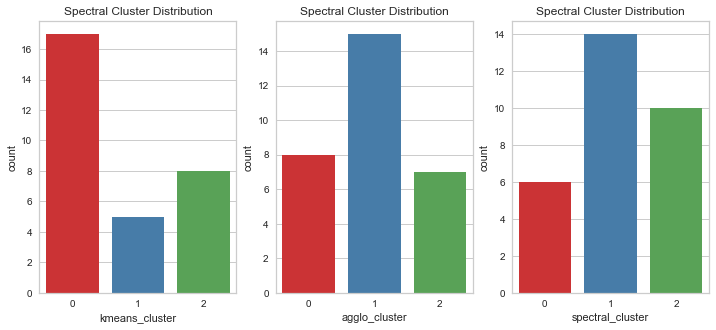

In [86]:
#show clustering result
plt.figure(figsize=(12, 5))

plt.subplot(1,3,1)
sns.countplot(data=inf_cluster, x='kmeans_cluster', palette='Set1')
plt.title('Spectral Cluster Distribution')

plt.subplot(1,3,2)
sns.countplot(data=inf_cluster, x='agglo_cluster', palette='Set1')
plt.title('Spectral Cluster Distribution')

plt.subplot(1,3,3)
sns.countplot(data=inf_cluster, x='spectral_cluster', palette='Set1')
plt.title('Spectral Cluster Distribution')

plt.show()

Berikut adalah hasil clustering dari ketiga model bagi data inference, dari komposisi setiap cluster tetap menunjukkan bahwa salah satu cluster lebih dominan dibanding cluster lainnya.

---
# 10. Pengambilan Kesimpulan

Dari proses EDA didapatkan:
-   Terdapat beberapa customer yang tidak memiliki balance sama sekali namun tetap melakukan pembayaran atau pembelian.
-   Mayoritas customer memakai kartu kredit untuk melakukan transaksi diantara 0 - 2000 dollar
-   Mayoritas customer melakukan pembelian antara 0-2000 dollar dalam satu kali transaksi.
-   Mayoritas customer melakukan installment purchasing sebesar 0 - 1000 dollar
-   Dominan customer tidak menyiapkan dana pembayaran dimuka.
-   Penggunaan kartu kredit masih sedikit, dengan banyaknya transaksi yang menggunakan kartu kredit mayoritas berada pada rentang 0-10 kali.
-   Ada sebagian kecil customer yang belum pernah menggunakan kartu kredit untuk melakukan transaksi.

Dari data proprocessing:
-   Semua kolom numeric dipilih karena menggunakan model PCA.
-   Terdapat missing value mencapai 3% dari keseluruhan data, maka data di handle dengan input median.
-   Terdapat ouliers pada seluruh data numerik, maka outliers dihanlde dengan capping winsorizer right tailed.
-   Selanjutnya lakukan scaling dengan menggunakan minmaxscaller dikarenakan seluruh data memiliki distribusi skew.
-   Hasil EVR dan elbow menunjukkan dimensi yang disarankan adalah 6 dimensi, maka PCA akan dilakukan dengan jumlah dimensi 6.
-   Melihat dari hasil ELbow dan silhouette, jumlah clsuter yang direkomendasikan adalah 3. Maka model yang dikembangkan akan menggunakan 3 cluster.

Dari model evaluation:
-   Dilihat dari 2D dan 3D mapping, K means dan spectral menunjukkan hasil clustering dengan garis yang lebih tegas (sedikit terdapat data yang menumpuk ke cluster lainnya).
-   Seperti hasil analisis pada 2D dan 3D, hasil silhouette score juga menunjukkan bahwa K means dan spectral menunjukkan performa yang bagus.

Hasil EDA X:
-   Penggolongan cluster berdasakan karakteristiknya yaitu sebagai berikut: cluster 0 merupakan cluster dimana customer jarang menggunakan credit card dan memiliki balance yang rendah, cluster 1 sering menggunakan credit card dengan balance yang lumayan besar serta sering melakukan pembelian dan pembayaran namun jarang menggunakan pembayaran dimuka (Cash in Advanced), lalu cluster 2 merupakan segment customer yang sering memakai credit card namun jumlah pembelian barang rendah dengan kemampuan pembayaran creditnya tinggi dan cenderung untuk melakukan pembayaran dimuka (Cash in Advanced) dibanding menggunakan balance / purchases.

Dari keseluruhan proses clustering didapatkan:
-   Model K means merupakan model terbaik bagi clustering data set ini.
-   Hasil clustering juga menunjukkan hasil yang baik dari visusalisasi 2D, 3D dan silhouette score.
-   Data inference juga berhasil dilakukan dengan hasil jumlah data dominan pada salah satu cluster

Untuk Pengembangan selanjutnya dapat dilakukan sebagai berikut:
-   Memasukkan kategori yang telah di encoding
-   Setting hyper parameter pada model
-   Mencoba model lain
-   Menggunakan model perhitungan n cluster lainnya (contoh dendogram)

---
# 11. CONCEPTUAL PROBLEM

Jawab pertanyaan berikut:

-   Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
Nilai total jarak antara tiap titik dengan centroid terdekatnya

Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
-  Elbow method adalah salah satu cara untuk mencari ukuran cluster yang optimal untuk menentukan ukuran cluster terbaik. Menentukan jumlah cluster yang tepat berdarkan nilai SSE (Sum of Square Error) yang mengalami penurunan drastis. Semakin besar nilai SSE, semakin berkurang kualitas cluster, begitu sebaliknya. Semakin kecil nilai SSE, semakin baik kualitas cluster. Elbow Method memiliki keunggulan waktu komputasi lebih efisien, kelemahannya kadang kurang terlihat patahan mana yang menunjukan penurunan nilai drastis, lalu lemah dalam menganalisis persebaran data serta bergantung pada 
inisialisasi centroid.

    Berikut tahap algoritma metode elbow untuk menentukan nilai k terbaik pada k means
    - Inisialisasi nilai k
    - Mulai
    - Naikkan nilai k
    - Hitung hasil SSE setiap nilai k
    - Amati hasil SSE setiap nilai K yang turun secara drastis
    - Tentukan nilai k optimal**

 Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !
- K means: bertujuan untuk meminimalisasikan objective function yang diset dalam proses clustering dengan cara meminimalkan variasi antar data yang ada di dalam suatu cluster dan memaksimalkan variasi dengan data yang ada di cluster lainnya juga bertujuan untuk menemukan grup dalam data, dengan jumlah grup yang diwakili oleh variabel K.

- Agglomerative: merupakan algoritma K-Means Clustering yang dimulai dengan jumlah cluster yang tetap. Algoritma ini menempatkan data ke dalam jumlah cluster yang tepat. Proses aglomerasi dimulai dengan membentuk setiap data sebagai satu cluster. Algoritma ini menggunakan beberapa metode pengukuran jarak, mengurangi satu cluster pada setiap iterasi dengan menggabungkan cluster tersebut dengan cluster lainnya.

- Spectral: menggunakan spektrum (eigenvalues) dari matriks Kesamaan untuk melakukan reduksi dimensional sebelum pengelompokan dalam dimensi yang lebih sedikit.